# Tutorial in the use of the `DynSys` python package
Author: Richard Hollamby, COWI UK Bridge, rihy@cowi.com

## Introduction
### Overview

This notebook provides a basic tutorial on how to use the `DynSys` library to faciliate common dynamic analysis tasks facing a structural engineer.

`DynSys` is a package, written in the Python 3 language, defining _functions_ and _classes_ that can be called upon in user scripts to perform sophisticated dynamic analyses.

The source code of the package is intended to be project-independent and as general as possible, to allow the widest field of application.

Of course there will be occasions where the current release of the package does not possess all the functionality that a user requires. In this eventuality, proficient users are encouraged to use the functionality that the package _does offer_ but override or tweak code as required for the new application. Please also provide feedback to RIHY, as it may well be that the updates can be incorporated into future releases of `DynSys`.

### API documentation

Full '**a**pplication **p**rogamming **i**nterface' HTML documentation is provided for each module, which has been prepared automatically from _doctrings_ included in the source code. This can be viewed at this [link](.\docs).

As with all Python modules (numpy, scipy etc.) users are strongly advised to **read the docs!** This will provide users with a clearer understanding of what a given function or class aims to do, details of parameters to pass (including those which are optional, or have default values assigned) and description of any error-catching routines that may be provided.

In addition all docs include links to the source code, to allow users to see for themselves how a given function or class has been implemented. This will hopefully allow users to gain confidence in what a function or class _actually_ does and so overcome the suspicion which is (rightfully) applied when using code written by others.

In the event of discovering a conflict between the documentation (docstrings) and actual behaviour, please inform RIHY. It may be the docstring simply requires updating - or truly that there is a bug to be addressed.

### Package contents
The following shows the full contents of the `DynSys` package and key details e.g. the version _that you are running_.

You can check on Github that you are up to date:
https://github.com/cowirihy/DynSys
and clone the 'Master' branch of the repository to your local drive

In [1]:
import dynsys
help(dynsys)

Help on package dynsys:

NAME
    dynsys

PACKAGE CONTENTS
    dyn_analysis
    dynsys
    hanging_1d_chain
    loading
    make_docs
    modalsys
    msd_chain
    ped_dyn
    tstep
    tstep_results

VERSION
    1.1.1

AUTHOR
    Richard Hollamby (RIHY), COWI UK Bridge

FILE
    c:\users\rihy\dynsys\dynsys\__init__.py




## A simple example
Enough explanation - lets get cracking with an example!

### Our first system

All forms of dynamic analysis involve a _system_; a physical structure of some kind, be it a bridge, a building or more abstract e.g. a set of interacting mass-spring-dashpot systems. So the first step in all dynamic analyses will be to define the system to be analysed.

The `DynSys` package includes a number of _classes_ which can be used to define systems. The most generic is the `dynsys.DynSys()` class (after which the whole package is named), so lets start with this...

[For those who are interested, all other classes defining systems are _derived classes_ of `dynsys.DynSys` and thus inherit key functionality from this _base class_.]

Lets start by looking at the docstring for `dynsys.DynSys()` to see what it can do.

In [2]:
# Imports used throughout the rest of this notebook
import inspect
from IPython.display import display, Markdown
import numpy
import matplotlib.pyplot as plt

In [3]:
from dynsys import dynsys
print(inspect.getdoc(dynsys.DynSys))

Class used to store general properties and methods
required to characterise a generic dynamic (2nd order) system


Sounds good! Lets look at the docstring for the class's `__init__` method to see how the `DynSys()` class works...

In [4]:
display(Markdown(inspect.getdoc(dynsys.DynSys.__init__)))

Dynamic systems, which may have constraints, are defined by the 
following:
    
$$ M\ddot{y} + C\dot{y} + Ky = f $$
$$ J\ddot{y} = 0 $$

***        
Required arguments:

* Mass matrix, `M`
    
* Damping matrix, `C`
    
* Stiffness matrix, `K`

All must be square and of shape _[nxn]_ 

***
Optional arguments:

* `isLinear` (True/False required)
    
* `J_dict`, _dict_ of constraint equations matrices. Shape of each 
entry must be _[mxn]_
    

Neat huh?!

So we can see that the `DynSys()` class can be used to define linear dynamic systems in the most general sense, i.e. defined by their mass, stiffness and damping matrices.

It is also possible to define _constrained_ systems, although this lets not go into this yet.

Lets make up some mass, stiffness and damping matrices and define our first system

In [5]:
# System matrices
M = [[1000,0],[0,200]]
K = [[2e6,-1e6],[-1e6,1e6]]
C = [[2000,-100],[-100,100]]
my_system = dynsys.DynSys(M=M,K=K,C=C,name="Test system")

Generic dynamic system `Test system` initialised.


So we now have an object, 'my_system', defining a system with 2 degrees of freedom.

Lets check the type is as expected:

In [6]:
type(my_system)

dynsys.dynsys.DynSys

### Units
At this point lets talk about units. Unless expressly stated otherwise, throughout the `DynSys` package units are assumed to be SI, i.e.:
    
* Masses are in kilograms (kg)

* Forces are in Newtons (N)

* Distances are in metres (m)

* Time is in seconds (s)

Dervied units also follow SI convention, e.g.:

* Frequencies are in Hz
* Accelerations are in $m/s^2$
* Stiffness is in $N/m$

This is **very important** to remember!

### Class attributes and methods
Like all classes in Python, the system object defined above has _attributes_ and _methods_. You should really read the documentation for full details, but here I'll show you a few, by way of example.

In [7]:
# Lets print out some attributes
print("Number of degrees of freedom: %s" % my_system.nDOF)
print("Mass matrix:\n{0}".format(my_system._M_mtrx))

Number of degrees of freedom: 2
Mass matrix:
[[1000    0]
 [   0  200]]


i.e. the parameters we used to define the dynamic system are held as attributes, bound to the object. Class _methods_ will generally perform operations using class attributes, which makes for modular and maintainable.

As in Python it is not possible to restrict variable visibility, the following conventions are used (consistent with PEP guidance for good Python code):

* Variables prefixed with '_' should be considered private. These may be accessed but should not be edited directly

* Variables prefixed with '__' are intended for local use only and should not generally be used

Lets try out a simple method of the `DynSys()` class:

In [8]:
# Lets use a basic method to print
my_system.PrintSystemMatrices()

**** PrintSystemMatrices() : `Test system` ****

Systems list:
['Test system']

---- System matrices for `Test system` ----

_M_mtrx matrix:
<class 'numpy.matrixlib.defmatrix.matrix'>
(2, 2)

_C_mtrx matrix:
<class 'numpy.matrixlib.defmatrix.matrix'>
(2, 2)

_K_mtrx matrix:
<class 'numpy.matrixlib.defmatrix.matrix'>
(2, 2)

---- Constraint matrices for `Test system` ----

(No constraints matrices defined)



All methods have docstrings, which can be inspected in the usual way:

In [9]:
Markdown(inspect.getdoc(my_system.PrintSystemMatrices))

Function is used to print system matrices to text window   
***
Useful for documentation and debugging

### Eigen analysis

Lets get to work and start using some some more sophisticated methods. First off we can compute the eigenproperties of the system, i.e. the systems free vibration characteristics. This is a useful thing to do in all sorts of applications.

The `CalcEigenproperties()` method should be used for this purpose. Lets check out the docstring to see how this works

In [10]:
Markdown(inspect.getdoc(my_system.CalcEigenproperties))

General method for determining damped eigenvectors and eigenvalues 
of system
***

Note in general eigenproperties will be complex due to non-proportional
damping.

Eigendecomposition of the system state matrix 'A' is carried out to 
obtain eigenvalues and displacement-velocity eigenvectors.

Engineers who are not familiar with the background theory should read
the following excellent paper:
    
*An Engineering Interpretation of the Complex 
Eigensolution of Linear Dynamic Systems*

by Christopher Hoen. 

[PDF](../references/An Engineering Interpretation of the Complex 
Eigensolution of Linear Dynamic Systems.pdf)

***
**Required:**
    
No arguments; the mass, stiffness, damping and (if defined) constraint 
matrices held as attributes of the system will be used.

***
**Optional:**
    
* `normaliseEigenvectors`, _boolean_, dictates whether eigenvectors 
  should be normalised, such that Y.T @ X = I
  
* `makePlots`, _boolean_, if True plots will be produced to illustrate 
  the eigensolution obtained
  
* `axarr`, list of _axes_ onto which plots should be made. If None 
  plots will be made onto new figures
  
* `verbose`, _boolean_, if True intermediate output & text will be 
  printed to the console
 
***
**Returns:**
     
_Dict_ containing the following entries:
    
* 's', _array_ containing the eigenvalues of 'A'

* 'X', _matrix_, the columns of which are the right-eigenvectors of 'A'

* 'Y', _matrix_, the columns of which are the left-eigenvectors of 'A'

The above entries will in general be complex-valued and represent the 
eigenproperties of 'A'.

The following entries are real-valued and 
express the complex eigenvalues 's' in terms which should be more 
familiar to structural/mechanical engineers:

* 'f_n', _array_ of _undamped natural frequencies_, in Hz. 
  
Note as 's' comprises conjugate pairs, there will be N pairs of 
positive and negative frequencies for a system with N degrees of 
freedom (i.e. 'A' matrix of shape [2N x 2N])
  
* 'f_d', _array_ of _damped_ natural frequencies_, in Hz

* 'w_n', 'w_d'; circular natural natural frequencies related to the 
  above, in rad/s
  
* 'eta', damping ratio (1.0=critical)
        

***
Note the docstring is pretty comprehensive and is rendered nicely in HTML using the Markdown language. This is true of all the docstrings in the `DynSys` module - although some are better than others! Let RIHY know if you think a specific docstring could be improved!

Lets use the method and inspect the _dict_ that gets returned

In [11]:
eig_res_dict = my_system.CalcEigenproperties()
print(eig_res_dict.keys())
print("f_n: {0}".format(eig_res_dict["f_n"]))
print("eta: {0}".format(eig_res_dict["eta"]))

dict_keys(['s', 'X', 'Y', 'f_n', 'w_n', 'eta', 'f_d', 'w_d', 'ax_list'])
f_n: [  4.5226373   -4.5226373   12.52372449 -12.52372449]
eta: [0.02608127 0.02608127 0.00646673 0.00646673]


Note from the docstring we could have told the method to produce some nice plots to illustate the complex eigensolution. Lets do this now!

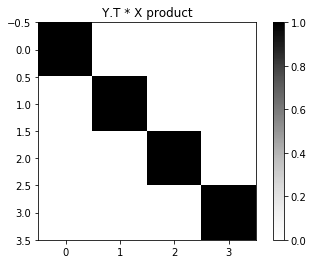

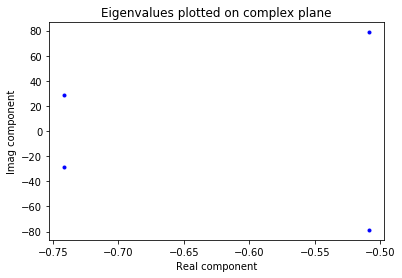

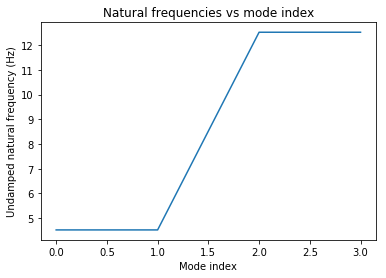

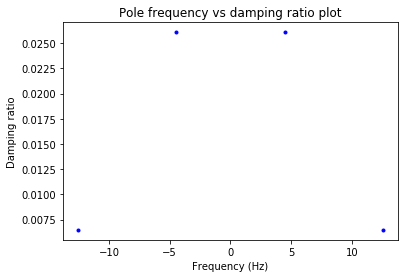

In [12]:
eig_res_dict = my_system.CalcEigenproperties(makePlots=True)

you'll find that lots of class methods defined within the `DynSys` package have the `makePlots` argument, as this can be used to consistently produce nice plots, relieving user of the need to write tedious plotting code themselves!

This also provides us with our first example of how a user might want to make use of the source code of `DynSys` yet _customise_ things. For example, suppose we want to restrict the last plot to showing positive frequencies only, we can do so as follows:

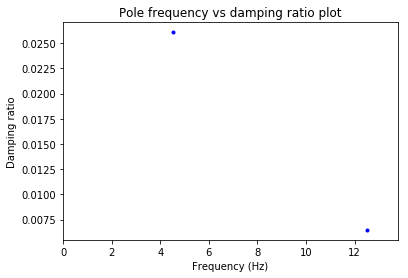

In [13]:
# Get axis object corresponding to the last plot
ax = eig_res_dict["ax_list"][3]
ax.set_xlim([0,ax.get_xlim()[1]])
ax.get_figure()

### Time-stepping analysis

Now we've got to grips with how to define a basic system, lets set up a basic time-stepping analysis and view the results.

The `DynSys` package contains a module `tstep` for this purpose:

In [14]:
import tstep
print(inspect.getdoc(tstep))

Classes and methods used to facilate time-stepping analysis involving dynamic 
systems


Looks like what we're after! At this point we should check out the [documentation](.\docs\tstep.html) for the `tstep` module. We would find that there a class `TStep()`:

In [15]:
Markdown(inspect.getdoc(tstep.TStep))

Class used to implement time-stepping analysis, i.e. to determine the 
time-varying response of a dynamic system, given known initial conditions 
and external loading

The ODE solution algorithm used is provided by Scipy (v1.0 and above).
Refer 
[Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) 
for further details: 

In [16]:
Markdown(inspect.getdoc(tstep.TStep.__init__))

Initialises time-stepping analysis

***
Required:
    
* `dynsys_obj`, instance of `dynsys` class (or derived classes), used 
  to define the dynamic system to which the analysis relates

***
Optional:

* `tStart`, start time (secs)
    
* `tEnd`, end time (secs)

* `dt`, constant time-step to use. If `None` then results will only be 
  returned at time steps chosen by `scipy.integrate.solve_ivp()`.

* `max_dt`, maximum time-step to use. Only applies if `dt=None`.

* `x0`, _array-like_ defining initial conditions of freedoms. Dict keys 
  are the names of the dynamic systems to which load functions relate. 
  If empty then zeros will be assumed.
  
* `force_func_dict`, dict of functions, used to define applied external forces. 
  If `None` then zero external forces will be assumed.

* `event_funcs`, _callable_ or _list of callables_, 
  events to track. Events are defined by functions which take a zero 
  value at the time of an event. Functions should have attribute 
  `terminal` and `direction` assigned to them to describe the required 
  behaviour. Refer [Scipy documentation] for further details.
  
* `post_event_funcs`, _callable_ or _list of callables_, functions to 
  execute immediately after `event_funcs` have resolved. If list, 
  length must correspond to length of `event_funcs`.
  
  [Scipy documentation]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

Note one of `x0` or `force_func` must be provided (this is checked) 
otherwise the dynamic system in question will not do anything!

So given the above information we can confidently set up a time-stepping analysis as follows:

In [17]:
my_analysis = tstep.TStep(my_system,tEnd=4.0,dt=0.005,x0=[1,0,0,0])

We can run the analysis using the `run()` method. Lets check out the docstring:

In [18]:
Markdown(inspect.getdoc(tstep.TStep.run))

Runs time-stepping analysis
***

Solution is obtained using Scipy's ODE solver for initial value 
problems [solve_ivp].

***
**Required:**

No arguments are required. Solution settings should have been defined 
when class was initialised; refer `__init__()` documentation.

***
**Optional**

* `method`, string, can be used to specify the particular 
  solver type to use.
  
Refer Scipy docs for details of the options avaliable.
`RK45` is the default solver. As described in the documentation for 
[solve_ivp], this is an explicit Runge-Kutta method of order 5(4). 
This should be appropriate for most applications.

* `verbose`, _boolean_, if True progress will be written to console

[solve_ivp]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

***
**Returns:**

Instance of `TStep_Results` class, in which results are stored. Refer 
[documentation](../docs/tstep_results.html) for details of attributes 
and methods avaliable.

***
So there does not appear to be anything else to set (as we've defined all the analysis options when defining the class). So lets run the analysis!

In [19]:
results = my_analysis.run()

Running time-stepping analysis...
Analysis time interval: [0.00, 4.00] seconds
Fixed 't_eval' time step specified: dt = 5.00e-03 seconds
Solving using Scipy's `solve_ivp()` function:
Solution complete!
Analysis complete!
The solver successfully reached the interval end.
Calculating DOF statistics...
Calculating response statistics for 'Test system'...
Total time steps: 800
Overall solution time: 0.218 seconds
Overall post-processing time: 0.037 seconds


Referring to the documentation for the `TStep_Results` class, within the `tstep_results` module, we can see that the class has a number of 'instance variables' (attributes), which are described in the documentation. Lets look at a few of these now:

In [20]:
print("nDOF: {0}".format(results.nDOF))           # Number of degrees of freedom for system being analysed
print("nResults: {0}".format(results.nResults))   # Number of time-steps at which results are recorded

nDOF: 2
nResults: 800


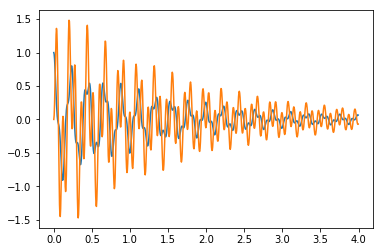

In [21]:
t_vals = results.t  # time values
disp = results.v    # Displacements of analysis DOFs

# We can make a quick plot of these results
plt.plot(t_vals,disp)

This is all well and good, but the above plot would need tweaking quite a bit to make it more presentable, e.g. setting axis labels, limits of x-axis etc. 

Rather than writing lots of plotting code ourselves, we should note that the `TStep_Results` class also has useful methods for plotting and manipulating results. Lets check out a few of these now.

Preparing state results plot...
Plot prepared after 0.064 seconds.
Preparing response results plots...
Plotting responses for 'Test system'...
# responses to plot: 0
nResponses=0, nothing to plot!


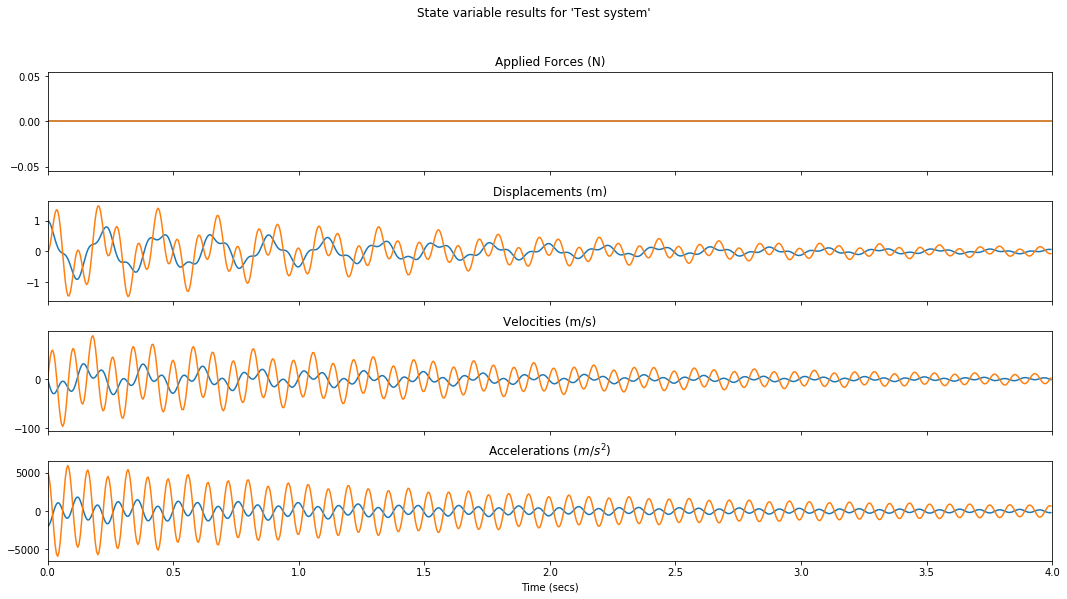

In [22]:
fig = results.PlotResults()

This is a nice plot, which would easily be used in a report or presentation. Thus as the user we don't need to write a plotting routine - its already there for us! We can of course customise the plot, using the figure handle returned to access the subplots etc. But equally we could just use it as it is!

From the plot we can see a plausible response has been obtained by the time-stepping solver:

* Initial conditions are as defined above:
    * 1m displacement in DOF1
    * 0m displacement in DOF2.
    * Zero inital velocities
    
* Gradual decay in amplitude of response, due to system's damping

* Zero applied force, as we didn't define anything!

The _time evaluation_ step `dt` specified is also evidently sufficient, given the smooth nature of the results obtained. As the docstring for `TStep.__init__()` describes, this is not the time-step used by the solver: the Scipy RK45 solver determines its own appropriate time step to use.

We can see the difference by redefining the analysis and re-running:

Running time-stepping analysis...
Analysis time interval: [0.00, 4.00] seconds
Maximum time step specified: max_dt = 0.100 seconds
Solving using Scipy's `solve_ivp()` function:
Solution complete!
Analysis complete!
The solver successfully reached the interval end.
Calculating DOF statistics...
Calculating response statistics for 'Test system'...
Total time steps: 338
Overall solution time: 0.177 seconds
Overall post-processing time: 0.021 seconds
Preparing state results plot...
Plot prepared after 0.050 seconds.


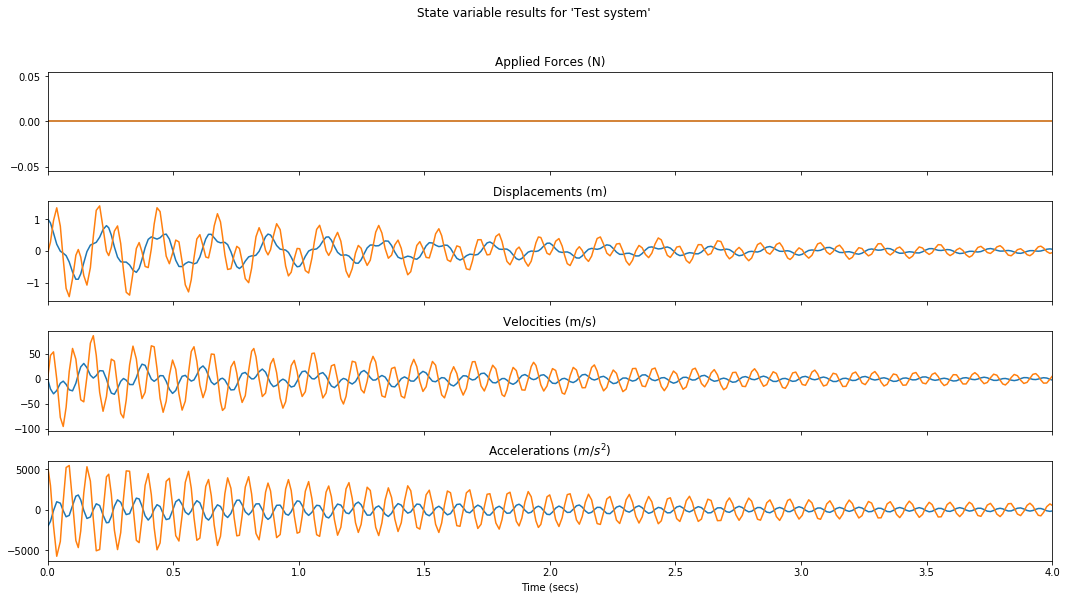

In [23]:
my_analysis = tstep.TStep(my_system,tEnd=4.0,x0=[1,0,0,0])
results = my_analysis.run()
fig = results.PlotStateResults()

Here the Scipy solver has been left to its own devices as to what time-step to use - and results are output at the solution times used by the solver (refer Scipy documentation that describes the behaviour). It can be seen that results are still essentially the same though in this case. But if we were to plot the time values we would find that the time series has variable time interval between time steps:

Text(0.5,0,'Time increment')

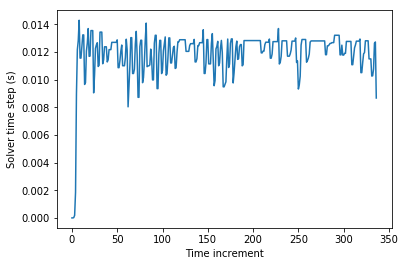

In [24]:
t_vals = results.t                              # retrieves time values from results object
dt_vals = t_vals[1:]-t_vals[:-1]                # computes time intervals between steps

fig,ax = plt.subplots()
ax.plot(list(range(len(dt_vals))),dt_vals)
ax.set_ylabel("Solver time step (s)")
ax.set_xlabel("Time increment")

The `TStep_Results()` class has a useful function for computing statistics of the time series obtained:

In [25]:
stats = results.CalcDOFStats()
stats

Calculating DOF statistics...


[{'max': array([[1.        ],
         [1.42530982]]), 'min': array([[-0.89238043],
         [-1.44174016]]), 'std': array([[0.27220852],
         [0.40935634]]), 'absmax': array([[1.        ],
         [1.44174016]])}, {'max': array([[31.14682501],
         [86.65825779]]), 'min': array([[-30.50726663],
         [-94.8501063 ]]), 'std': array([[ 8.62592889],
         [26.68203723]]), 'absmax': array([[31.14682501],
         [94.8501063 ]])}, {'max': array([[1809.09178805],
         [5455.61603386]]), 'min': array([[-2000.        ],
         [-5752.56575992]]), 'std': array([[ 572.00960261],
         [2083.61289268]]), 'absmax': array([[2000.        ],
         [5752.56575992]])}, {'max': array([[0.],
         [0.]]), 'min': array([[0.],
         [0.]]), 'std': array([[0.],
         [0.]]), 'absmax': array([[0.],
         [0.]])}]

From the docstring for the `CalcDOFStats()` method we can learn about the format of the results returned:

In [26]:
Markdown(inspect.getdoc(results.CalcDOFStats))

Obtain basic statistics to describe DOF time series

***
**Required:**

No arguments are required

***
**Optional:**

* `verbose`, _boolean_, controls the amount of console output

***
**Returns:**

Stats are returned as a _list_ of _dicts_, with list indexs as follows:
    
* 0 : DOF displacements

* 1 : DOF velocities

* 2 : DOF accelerations

* 3 : Constraint forces (only if constraints defined)

Dict entries will in general be _arrays_, giving stats results for each 
degree of freedom

Thus statistics for DOF velocities can be obtained using index 1:

In [27]:
vel_stats = stats[1] # dict of stats for DOF velocities
vel_stats["absmax"]

array([[31.14682501],
       [94.8501063 ]])

which can be seen to be correct, with regards to results plotted in the above graphs.

### Output matrices

Quite often we are interesting in computing results for variables which are a linear combination of state results (displacements, velocities, acceleration). E.g. with this example we might be interested in computing relative displacements and velocities between the masses.

In [28]:
my_system.AddOutputMtrx(output_mtrx=[[1,-1,0,0,0,0],[0,0,1,-1,0,0]],
                        output_names=["Rel disp (m)","Rel velocity ($m/s$)"])
my_system.output_mtrx

matrix([[ 1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -1.,  0.,  0.]])

Lets re-run the analysis to compute responses

In [29]:
results=my_analysis.run()

Running time-stepping analysis...
Analysis time interval: [0.00, 4.00] seconds
Maximum time step specified: max_dt = 0.100 seconds
Solving using Scipy's `solve_ivp()` function:
Solution complete!
Analysis complete!
The solver successfully reached the interval end.
Calculating DOF statistics...
Calculating response statistics for 'Test system'...
Total time steps: 338
Overall solution time: 0.195 seconds
Overall post-processing time: 0.020 seconds


Preparing response results plots...
Plotting responses for 'Test system'...
# responses to plot: 2
Plots prepared after 0.037 seconds.


[<Figure size 1008x576 with 2 Axes>]

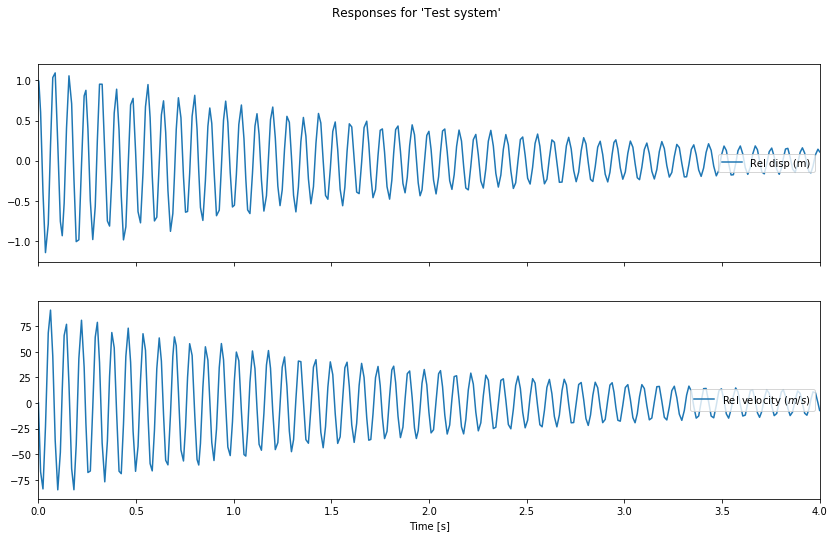

In [30]:
results.PlotResponseResults(useCommonScale=False)